In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import Callback
from sklearn.model_selection import train_test_split


import functions.parse_data as parse
import functions.models as md
import functions.handy_functions as hf

In [2]:

data_water=parse.parse('cloudrm_water.dat')
data_water=data_water.drop(columns=['Surface_Desc'])

Train test split below att the moment gives 60/20/20 split.

In [3]:
##Train test validation split##
X_labels= ['Cloud_B01','Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
           'Cloud_B07','Cloud_B08','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12','Cloud_B13',
           'Sat_Zenith_Angle','Sun_Zenith_Angle','Azimuth_Diff_Angle','COT','Cloud_Type','Profile_ID','GOT','Water_Vapor']

y_labels=['Clear_B01','Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
           'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11','Clear_B12','Clear_B13']

df=hf.normalise_input_df(data_water,X_labels)

model, history, X_test,y_test=md.train_simple_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=15)




Epoch 1/15

1000/1000 [==============================] - 30s 30ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2/15
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 3/15
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/15
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 5/15
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 6/15
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/15
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 8/15
1000/1000 [=======================

In [7]:
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=2)
print(f"Test mse: {test_mse}")

313/313 - 2s - loss: 0.0015 - mse: 0.0015 - 2s/epoch - 8ms/step
Test mse: 0.001544905942864716


In [8]:
y_predict=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


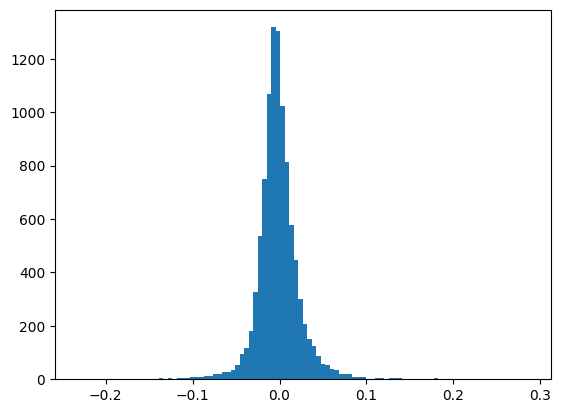

In [23]:
y_test_np=y_test.to_numpy()
channel=2
plt.hist(y_predict[:,channel]-y_test_np[:,channel],bins=100)
plt.show()